In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

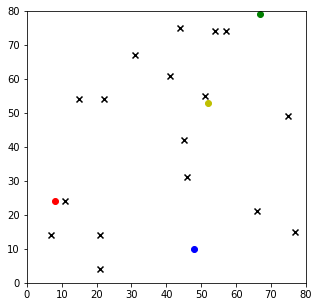

In [2]:
#指定點位
df = pd.DataFrame({
    'x':[15 , 22, 57, 45, 46, 11, 54, 77, 41, 44, 66, 21, 75, 31, 21, 7, 51],
    'y':[54 , 54, 74, 42, 31, 24, 74, 15, 61, 75, 21, 14, 49, 67, 4, 14, 55]
})
#隨機點位

#樣本種子碼
np.random.seed(100)
#中心點數量
k = 4
#中心點分布
centroids = {
    i+1:[np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}
#圖表大小
fig = plt.figure(figsize=(5,5))
#分布點位  x座標 ,y座標 ,符號o,x,*><^,顏色
plt.scatter(df['x'],df['y'],marker = 'x',color = 'k')
#指定中心點位顏色
colmap = {1:'r' , 2:'g' , 3:'b' , 4:'y'}
#給予中心點位顏色
for i in centroids.keys():
    plt.scatter(*centroids[i],color = colmap[i])
#x軸
plt.xlim(0,80)
#y軸
plt.ylim(0,80)
plt.show()

In [3]:
centroids
#中心點數量
centroids.keys()

dict_keys([1, 2, 3, 4])

In [4]:
l =[1,2,4,5]
#計算
list(map(lambda x:x**3 , l))
#並未給值
l
#給值後輸出
l = list(map(lambda x:x**3 , l))
l

[1, 8, 64, 125]

    x   y  distance_from_1  distance_from_2  distance_from_3  distance_from_4  \
0  15  54        30.805844        57.697487        55.000000        37.013511   
1  22  54        33.105891        51.478151        51.107729        30.016662   
2  57  74        70.007142        11.180340        64.629715        21.587033   
3  45  42        41.146081        43.046487        32.140317        13.038405   
4  46  31        38.639358        52.392748        21.095023        22.803509   

   closest color  
0        1     r  
1        4     y  
2        2     g  
3        4     y  
4        3     b  


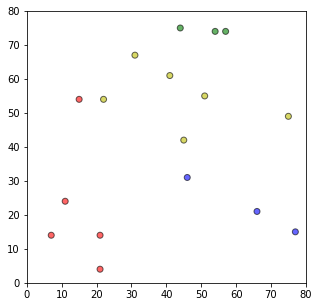

In [5]:

def assignment(df,cendtriods):
    for i in centroids.keys():
        #sqrt平方((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(((df['x'] - centroids[i][0])**2)+
                    (df['y'] - centroids[i][1])**2)
            )
    #標記個點距離
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    #取出各點最小值
    #在某個數列全數附值(:),df.loc取出特定列
    df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis = 1)
    #組別判斷藉由距離值判斷
    #見結果組織list回傳
    df['closest'] = df['closest'].map(lambda x:int(x.lstrip('distance_from_')))
    #該點的分組顏色
    df['color'] = df['closest'].map(lambda x:colmap[x])
    #回傳df的值
    return df

#將df資料更新為分組函數過後的數值
df = assignment(df,centroids)
#貼出分析資料
print(df.head())
#表格大小
fig = plt.figure(figsize=(5,5))
#edgecolor 預設顏色k
plt.scatter(df['x'],df['y'],color = df['color'],alpha = 0.6,edgecolor = 'k')
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

{1: [15.0, 22.0], 2: [51.666666666666664, 74.33333333333333], 3: [63.0, 22.333333333333332], 4: [44.166666666666664, 54.666666666666664]}
{1: [8, 24], 2: [67, 79], 3: [48, 10], 4: [52, 53]}


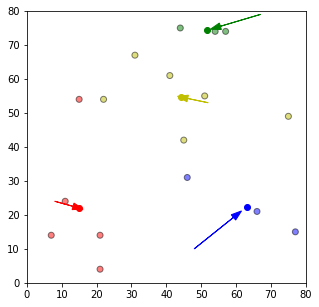

In [6]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)
print(old_centroids)
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5 , edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=3,fc=colmap[i],ec=colmap[i])
plt.show()

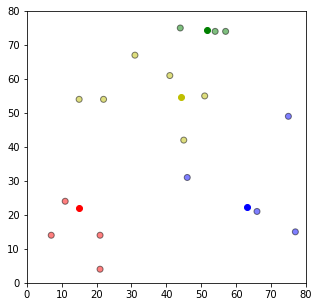

In [7]:
df = assignment(df,centroids)

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

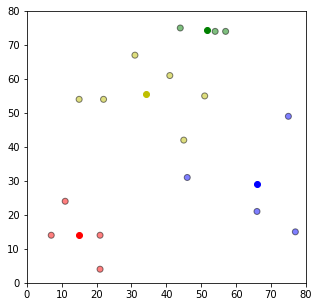

In [8]:
while True:
    closest_controids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if closest_controids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [9]:
df =pd.DataFrame({
     'x':[15 , 22, 57, 45, 46, 11, 54, 77, 41, 44, 66, 21, 75, 31, 21, 7, 51],
    'y':[54 , 54, 74, 42, 31, 24, 74, 5, 61, 75, 11, 14, 49, 67, 4, 14, 55]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

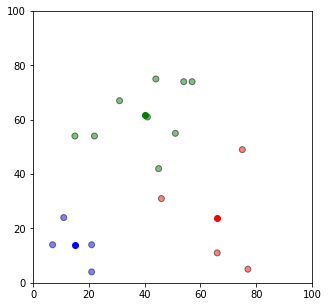

In [11]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x:colmap[x+1],labels)

plt.scatter(df['x'],df['y'],color=list(colors),alpha=0.5,edgecolor='k')
for idx,centroids in enumerate(centroids):
    plt.scatter(*centroids, color=colmap[idx+1])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()